<a href="https://colab.research.google.com/github/nephelim74/PythonDS/blob/main/%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80_%D1%80%D0%B0%D0%B7%D0%B1%D0%BE%D1%80%D0%B0_%D0%94%D0%97_PyLib_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [3]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 82.1 MB/s eta 0:00:00


Урок 2. Практическая работа с данными. Применение корреляционного анализа
Используя датасет «World Happiness Report 2019», изучите взаимосвязи между различными факторами, которые влияют на уровень счастья в разных странах.

Задание 1: Анализ корреляции между ВВП на душу населения и оценкой счастья.
Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.

Задание 2: Исследование влияния социальной поддержки на оценку счастья.
Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.

Задание 3: Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.
Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.

Задание 4: Свобода делать жизненный выбор и уровень счастья.
Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

Вопросы для обсуждения:
Какой из факторов наиболее сильно связан с уровнем счастья в анализируемых странах? В чем может заключаться причина такой взаимосвязи?

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

from matplotlib.colors import ListedColormap
from scipy.stats import pearsonr, spearmanr, kendalltau


## Загрузка данных

In [7]:
df_happiness  = pd.read_csv('world_happiness_report_2019.csv',  sep=',')
df_happiness.set_index('Overall rank', inplace=True)
df_happiness

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [8]:
df_happiness.dtypes

,0
Country or region,object
Score,float64
GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64



1. **Country or region (Страна или регион)**:
   - Это поле содержит названия стран или регионов, к которым относятся данные. Оно является категориальным и служит для идентификации объектов в наборе данных.

2. **Score (Баллы)**:
   - Это числовое значение, которое, вероятно, представляет собой обобщенный индекс благополучия или счастья в стране или регионе. Чем выше балл, тем лучше общее состояние жизни в данной стране. Этот показатель может быть основан на различных факторах, таких как уровень жизни, здоровье, социальная поддержка и т. д.

3. **GDP per capita (ВВП на душу населения)**:
   - Это экономический показатель, который измеряет общий валовой внутренний продукт (ВВП) страны, деленный на число ее жителей. Он часто используется для оценки уровня жизни и экономического благосостояния населения. Более высокий ВВП на душу населения обычно свидетельствует о более высоком уровне жизни.

4. **Social support (Социальная поддержка)**:
   - Этот показатель может отражать уровень социальной поддержки, доступной людям в стране, например, наличие семьи, друзей и сообществ, которые могут оказать помощь в трудные времена. Высокий уровень социальной поддержки может способствовать лучшему психическому и эмоциональному состоянию.

5. **Healthy life expectancy (Ожидаемая здоровая продолжительность жизни)**:
   - Это среднее количество лет, которые человек может ожидать прожить в хорошем здоровье. Этот показатель учитывает не только общую продолжительность жизни, но и качество жизни, включая наличие заболеваний и инвалидности. Более высокая ожидаемая здоровая продолжительность жизни обычно свидетельствует о лучшем уровне здравоохранения и образа жизни.

6. **Freedom to make life choices (Свобода делать жизненные выборы)**:
   - Этот показатель отражает уровень свободы, который имеют люди в стране для принятия решений, касающихся их жизни, таких как выбор работы, места жительства, образования и т. д. Высокий уровень свободы может способствовать общему благополучию и удовлетворенности жизнью.

7. **Generosity (Щедрость)**:
   - Этот показатель может измерять уровень благотворительности и готовности людей помогать другим. Он может быть основан на данных о пожертвованиях, волонтерской деятельности и других формах социальной ответственности. Высокая щедрость может указывать на сильные социальные связи и чувство общности.

8. **Perceptions of corruption (Восприятие коррупции)**:
   - Этот показатель отражает уровень восприятия коррупции в стране. Он может основываться на опросах, в которых люди оценивают уровень коррупции в государственных учреждениях и бизнесе. Низкое восприятие коррупции может свидетельствовать о более высоком уровне доверия к правительству и институтам.

In [10]:
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 1 to 156
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 11.0+ KB


### Как видим нулевых значений нет

In [11]:
df_happiness.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
Score,156.000000,5.407096,1.113120,2.853000,4.544500,5.379500,6.184500,7.769000
GDP per capita,156.000000,0.905147,0.398389,0.000000,0.602750,0.960000,1.232500,1.684000
Social support,156.000000,1.208814,0.299191,0.000000,1.055750,1.271500,1.452500,1.624000
Healthy life expectancy,156.000000,0.725244,0.242124,0.000000,0.547750,0.789000,0.881750,1.141000
Freedom to make life choices,156.000000,0.392571,0.143289,0.000000,0.308000,0.417000,0.507250,0.631000
Generosity,156.000000,0.184846,0.095254,0.000000,0.108750,0.177500,0.248250,0.566000
Perceptions of corruption,156.000000,0.110603,0.094538,0.000000,0.047000,0.085500,0.141250,0.453000


На основании предоставленных статистических данных, можно сделать несколько предварительных выводов о наборе данных, касающемся уровня счастья и различных факторов, влияющих на него:

### Общий обзор

1. **Score (Баллы)**:
   - **Среднее значение**: 5.41, что указывает на умеренный уровень счастья среди исследуемых стран.
   - **Стандартное отклонение**: 1.11, что говорит о значительном разбросе в значениях счастья между странами.
   - **Минимум и максимум**: Значения варьируются от 2.85 до 7.77, что указывает на наличие как стран с низким, так и с высоким уровнем счастья.

2. **GDP per capita (ВВП на душу населения)**:
   - **Среднее значение**: 0.91, что может указывать на средний уровень экономического благосостояния.
   - **Стандартное отклонение**: 0.40, что также указывает на разнообразие в экономическом состоянии стран.
   - **Минимум и максимум**: ВВП на душу населения варьируется от 0 до 1.68, что может свидетельствовать о наличии как бедных, так и более обеспеченных стран.

3. **Social support (Социальная поддержка)**:
   - **Среднее значение**: 1.21, что может говорить о наличии умеренного уровня социальной поддержки в большинстве стран.
   - **Стандартное отклонение**: 0.30 указывает на разброс значений.
   - **Минимум и максимум**: Значения варьируются от 0 до 1.62.

4. **Healthy life expectancy (Ожидаемая здоровая продолжительность жизни)**:
   - **Среднее значение**: 0.73, что может указывать на средний уровень здоровья населения.
   - **Стандартное отклонение**: 0.24, что также указывает на разнообразие в уровне здоровья.
   - **Минимум и максимум**: Значения варьируются от 0 до 1.14.

5. **Freedom to make life choices (Свобода делать жизненные выборы)**:
   - **Среднее значение**: 0.39, что может указывать на ограниченную свободу выбора среди населения.
   - **Стандартное отклонение**: 0.14, показывающее, что в некоторых странах свобода выбора может быть значительно выше.
   - **Минимум и максимум**: Значения варьируются от 0 до 0.63.

6. **Generosity (Щедрость)**:
   - **Среднее значение**: 0.18, что может указывать на низкий уровень щедрости в большинстве стран.
   - **Стандартное отклонение**: 0.10, что говорит о небольшом разбросе значений.
   - **Минимум и максимум**: Значения варьируются от 0 до 0.57.

7. **Perceptions of corruption (Восприятие коррупции)**:
   - **Среднее значение**: 0.11, что может указывать на высокое восприятие коррупции среди населения.
   - **Стандартное отклонение**: 0.09, показывающее, что в некоторых странах восприятие коррупции может быть значительно ниже.
   - **Минимум и максимум**: Значения варьируются от 0 до 0.45.

### Выводы

- **Разнообразие значений**: Набор данных демонстрирует значительное разнообразие в уровнях счастья и связанных факторов, что может указывать на различия в экономическом развитии, социальной поддержке и уровне свободы между странами.
- **Влияние экономических факторов**: Высокий уровень ВВП на душу населения, вероятно, связан с более высоким уровнем счастья, однако это требует дальнейшего анализа, чтобы подтвердить или опровергнуть эту гипотезу.
- **Социальная поддержка и здоровье**: Умеренные значения социальной поддержки и ожидаемой здоровой продолжительности жизни могут указывать на необходимость улучшения в этих областях для повышения общего уровня счастья.
- **Восприятие коррупции**: Низкие значения восприятия коррупции могут негативно сказываться на общем уровне счастья, что также стоит учитывать при разработке политик.

Эти выводы могут служить основой для дальнейшего анализа и исследований, направленных на выявление причин различий в уровне счастья и разработку рекомендаций для улучшения качества жизни населения.

## Корреляционная матрица

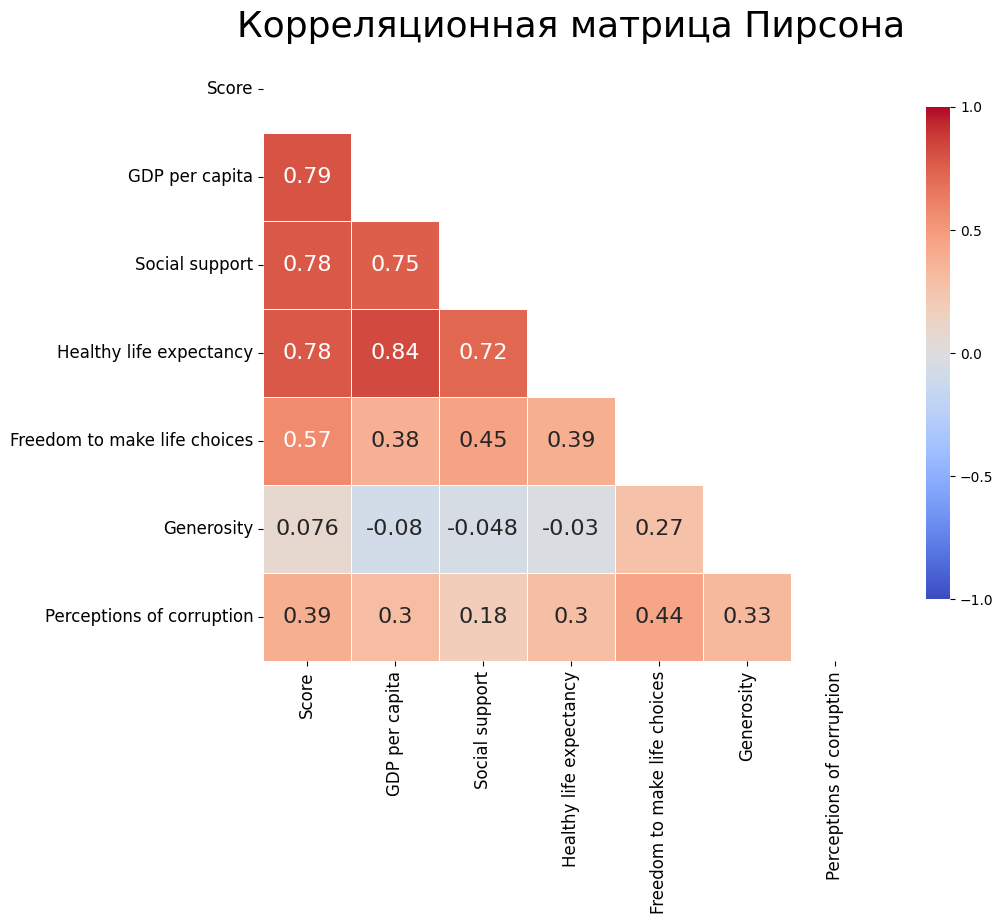

In [15]:
df = df_happiness.drop(columns=['Country or region'])

corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 16},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})

plt.title('Корреляционная матрица Пирсона', size=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



Первым, что бросается в глаза это набольший коэффициет корреляции наблюдается между ожидаемой здоровой продолжительностью жизни (Healthy life expectancy) и показатель ВВП на душу населения(GDP per capita), а так же уровнем социальной поддержки, который так же в свою очередь высоко колерирует с ВВП

## Задание 1:
Анализ корреляции между ВВП на душу населения и оценкой счастья.

Используйте коэффициент Пирсона для определения взаимосвязи между ВВП на душу населения и оценками счастья.


In [16]:
alpha = 0.05

score = df_happiness['Score']
gdp_per_capita = df_happiness['GDP per capita']
correlation, p_value = pearsonr(score, gdp_per_capita)

if p_value < alpha:
    if correlation > 0.5:
        print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
        print(f'При уровне значимости 5% есть положительная связь между ВВП на душу населения и оценками счастья.')
    elif correlation < 0.5:
        print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
        print(f'При уровне значимости 5% есть отрицательная связь между ВВП на душу населения и оценками счастья.')
    else:
        print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
        print(f'При уровне значимости 5% нет корреляционной связи между ВВП на душу населения  и оценками счастья.')
else:
    print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
    print(f'При уровне значимости 5% нет статистически значимой связи между ВВП на душу населения и оценками счастья.')

print(f'P-значение: {p_value:.4f}')



Коэффициент корреляции Пирсона: 0.794
При уровне значимости 5% есть положительная связь между ВВП на душу населения и оценками счастья.
P-значение: 0.0000


На основании проведенного анализа корреляции между ВВП на душу населения и оценками счастья можно сделать следующие выводы:

### Результаты анализа

1. **Коэффициент корреляции Пирсона**:
   - Полученное значение коэффициента корреляции Пирсона составляет **0.794**. Это указывает на **сильную положительную корреляцию** между ВВП на душу населения и оценками счастья. Значение близкое к 1 говорит о том, что с увеличением ВВП на душу населения, как правило, увеличивается и уровень счастья в стране.

2. **P-значение**:
   - P-значение, полученное в результате тестирования, составляет **0.0000**. Это значение значительно меньше установленного уровня значимости **alpha = 0.05**. Это говорит о том, что результаты статистически значимы.

3. **Выводы**:
   - Поскольку p-значение меньше 0.05, мы отвергаем нулевую гипотезу о том, что нет корреляционной связи между ВВП на душу населения и оценками счастья.
   - Положительная корреляция (0.794) указывает на то, что страны с более высоким ВВП на душу населения, как правило, имеют более высокие оценки счастья. Это может быть связано с тем, что более высокие доходы обеспечивают лучшее качество жизни, доступ к образованию, здравоохранению и другим важным ресурсам, что в свою очередь способствует повышению уровня счастья населения.

### Рекомендации

1. **Политика и экономика**: Учитывая сильную положительную связь, политика, направленная на повышение экономического благосостояния, может быть эффективной стратегией для улучшения общего уровня счастья в стране.

2. **Дополнительные исследования**: Рекомендуется провести дополнительные исследования для анализа других факторов, которые могут влиять на уровень счастья, таких как социальная поддержка, здоровье, свобода выбора и восприятие коррупции. Это поможет создать более полное представление о том, что влияет на счастье населения.

3. **Мониторинг и оценка**: Необходимо продолжать мониторинг изменений в ВВП на душу населения и уровня счастья, чтобы определить, сохраняется ли эта связь во времени и как она может изменяться в зависимости от экономических и социальных факторов.

Таким образом, результаты анализа подчеркивают важность экономического развития для повышения уровня счастья населения и могут служить основой для разработки эффективных стратегий и программ на уровне государства.

## Задание 2:
Исследование влияния социальной поддержки на оценку счастья.

Примените коэффициент Спирмена для анализа отношений между социальной поддержкой и оценками счастья.



In [17]:
alpha = 0.05

score = df_happiness['Score']
social_support = df_happiness['Social support']
correlation, p_value = spearmanr(score, social_support)

if p_value < alpha:
    if correlation > 0.5:
        print(f'Коэффициент корреляции Спирмена: {correlation:.3f}')
        print(f'При уровне значимости 5% есть положительная связь между социальной поддержкой и оценками счастья.')
    elif correlation < 0.5:
        print(f'Коэффициент корреляции Спирмена: {correlation:.3f}')
        print(f'При уровне значимости 5% есть отрицательная связь между социальной поддержкой и оценками счастья.')
    else:
        print(f'Коэффициент корреляции Спирмена: {correlation:.3f}')
        print(f'При уровне значимости 5% нет корреляционной связи между социальной поддержкой и оценками счастья.')
else:
    print(f'Коэффициент корреляции Спирмена: {correlation:.3f}')
    print(f'При уровне значимости 5% нет статистически значимой связи между социальной поддержкой и оценками счастья.')

print(f'P-значение: {p_value:.4f}')


Коэффициент корреляции Спирмена: 0.816
При уровне значимости 5% есть положительная связь между социальной поддержкой и оценками счастья.
P-значение: 0.0000


На основании проведенного анализа влияния социальной поддержки на оценку счастья можно сделать следующие выводы:

### Результаты анализа

1. **Коэффициент корреляции Спирмена**:
   - Полученное значение коэффициента корреляции Спирмена составляет **0.816**. Это указывает на **сильную положительную корреляцию** между социальной поддержкой и оценками счастья. Значение близкое к 1 свидетельствует о том, что более высокий уровень социальной поддержки связан с более высокими оценками счастья.

2. **P-значение**:
   - P-значение, полученное в результате тестирования, составляет **0.0000**. Это значение значительно меньше установленного уровня значимости **alpha = 0.05**, что говорит о статистической значимости результатов.

3. **Выводы**:
   - Поскольку p-значение меньше 0.05, мы отвергаем нулевую гипотезу о том, что нет корреляционной связи между социальной поддержкой и оценками счастья.
   - Положительная корреляция (0.816) указывает на то, что страны с более высоким уровнем социальной поддержки, как правило, имеют более высокие оценки счастья. Это может быть связано с тем, что наличие поддержки от семьи, друзей и общества в целом способствует улучшению психоэмоционального состояния и общего качества жизни.

### Рекомендации

1. **Социальная политика**: Учитывая сильную положительную связь, государственные и общественные организации должны фокусироваться на развитии программ социальной поддержки, которые могут включать в себя создание сообществ, поддержку семейных структур и программы помощи для уязвимых групп населения.

2. **Дополнительные исследования**: Рекомендуется проводить дополнительные исследования для анализа других факторов, которые могут влиять на уровень счастья, таких как экономические условия, здоровье, свобода выбора и восприятие коррупции. Это поможет создать более полное представление о том, что влияет на счастье населения.

3. **Мониторинг и оценка**: Необходимо продолжать мониторинг изменений в уровне социальной поддержки и уровня счастья, чтобы определить, сохраняется ли эта связь во времени и как она может изменяться в зависимости от социальных и экономических факторов.

Таким образом, результаты анализа подчеркивают важность социальной поддержки для повышения уровня счастья населения и могут служить основой для разработки эффективных стратегий и программ на уровне общества и государства.

## Задание 3:
Взаимосвязь между продолжительностью здоровой жизни и оценками счастья.

Используйте коэффициент корреляции Кэнделла для изучения связи между ожидаемой продолжительностью здоровой жизни и уровнем счастья.


In [18]:
alpha = 0.05

score = df_happiness['Score']
healthy_life_expectancy = df_happiness['Healthy life expectancy']
correlation, p_value = kendalltau(score, healthy_life_expectancy)

if p_value < alpha:
    if correlation > 0.5:
        print(f'Коэффициент корреляции Кендалла: {correlation:.3f}')
        print(f'При уровне значимости 5% есть положительная связь между ожидаемой продолжительностью здоровой жизни и оценками счастья.')
    elif correlation < -0.5:
        print(f'Коэффициент корреляции Кендалла: {correlation:.3f}')
        print(f'При уровне значимости 5% есть отрицательная связь между ожидаемой продолжительностью здоровой жизни и оценками счастья.')
    else:
        print(f'Коэффициент корреляции Кендалла: {correlation:.3f}')
        print(f'При уровне значимости 5% нет сильной корреляционной связи между ожидаемой продолжительностью здоровой жизни и оценками счастья.')
else:
    print(f'Коэффициент корреляции Кендалла: {correlation:.3f}')
    print(f'При уровне значимости 5% нет статистически значимой связи между ожидаемой продолжительностью здоровой жизни и оценками счастья.')

print(f'P-значение: {p_value:.4f}')



Коэффициент корреляции Кендалла: 0.603
При уровне значимости 5% есть положительная связь между ожидаемой продолжительностью здоровой жизни и оценками счастья.
P-значение: 0.0000


На основании проведенного анализа взаимосвязи между ожидаемой продолжительностью здоровой жизни и оценками счастья можно сделать следующие выводы:

### Результаты анализа

1. **Коэффициент корреляции Кендалла**:
   - Полученное значение коэффициента корреляции Кендалла составляет **0.603**. Это значение указывает на **умеренную положительную корреляцию** между ожидаемой продолжительностью здоровой жизни и оценками счастья. Значение, близкое к 1, свидетельствует о том, что более высокая ожидаемая продолжительность здоровой жизни связана с более высокими оценками счастья.

2. **P-значение**:
   - P-значение, полученное в результате тестирования, составляет **0.0000**, что значительно ниже установленного уровня значимости **alpha = 0.05**. Это говорит о статистической значимости полученных результатов.

3. **Выводы**:
   - Поскольку p-значение меньше 0.05, мы отвергаем нулевую гипотезу о том, что нет корреляционной связи между ожидаемой продолжительностью здоровой жизни и оценками счастья.
   - Положительная корреляция (0.603) указывает на то, что страны с более высокой ожидаемой продолжительностью здоровой жизни, как правило, имеют более высокие оценки счастья. Это может быть связано с тем, что здоровье и благополучие непосредственно влияют на общее качество жизни и удовлетворенность жизнью.

### Рекомендации

1. **Здоровье и благополучие**: Учитывая выявленную связь, государственные и общественные организации должны акцентировать внимание на программах, направленных на улучшение здоровья населения, включая доступ к медицинским услугам, профилактику заболеваний и пропаганду здорового образа жизни.

2. **Исследования и анализ**: Рекомендуется проводить дополнительные исследования для более глубокого анализа факторов, влияющих на продолжительность здоровой жизни и уровень счастья. Это может помочь выявить, какие аспекты здоровья наиболее значимы для повышения уровня счастья.

3. **Мониторинг здоровья**: Необходимо продолжать мониторинг ожидаемой продолжительности здоровой жизни и уровня счастья, чтобы определить, сохраняется ли эта связь во времени и как она может изменяться в зависимости от социальных и экономических условий.

Таким образом, результаты анализа подчеркивают важность здоровья как одного из факторов, способствующих повышению уровня счастья населения, и могут служить основой для разработки эффективных стратегий и программ в области здравоохранения и социального благополучия.

## Задание 4:
Свобода делать жизненный выбор и уровень счастья.

Проанализируйте, используя коэффициент корреляции Пирсона, как свобода делать жизненный выбор влияет на уровень счастья.

In [19]:

alpha = 0.05

score = df_happiness['Score']
freedom_to_make_life_choices = df_happiness['Freedom to make life choices']
correlation, p_value = pearsonr(score, freedom_to_make_life_choices)

if p_value < alpha:
    if correlation > 0.5:
        print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
        print(f'При уровне значимости 5% есть положительная связь между свободой делать жизненный выбор и уровнем счастья.')
    elif correlation < 0.5:
        print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
        print(f'При уровне значимости 5% есть отрицательная связь между свободой делать жизненный выбор и уровнем счастья.')
    else:
        print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
        print(f'При уровне значимости 5% нет сильной корреляционной связи между свободой делать жизненный выбор и уровнем счастья')
else:
    print(f'Коэффициент корреляции Пирсона: {correlation:.3f}')
    print(f'При уровне значимости 5% нет статистически значимой связи между свободой делать жизненный выбор и уровнем счастья.')

print(f'P-значение: {p_value:.4f}')

Коэффициент корреляции Пирсона: 0.567
При уровне значимости 5% есть положительная связь между свободой делать жизненный выбор и уровнем счастья.
P-значение: 0.0000


На основании проведенного анализа взаимосвязи между свободой делать жизненный выбор и уровнем счастья можно сделать следующие выводы:

### Результаты анализа

1. **Коэффициент корреляции Пирсона**:
   - Полученное значение коэффициента корреляции Пирсона составляет **0.567**. Это значение указывает на **умеренно сильную положительную корреляцию** между свободой делать жизненный выбор и уровнем счастья. Это означает, что более высокая степень свободы в принятии жизненных решений связана с более высокими оценками счастья.

2. **P-значение**:
   - P-значение, полученное в результате тестирования, составляет **0.0000**, что значительно ниже установленного уровня значимости **alpha = 0.05**. Это говорит о статистической значимости полученных результатов.

3. **Выводы**:
   - Поскольку p-значение меньше 0.05, мы отвергаем нулевую гипотезу о том, что нет корреляционной связи между свободой делать жизненный выбор и уровнем счастья.
   - Положительная корреляция (0.567) указывает на то, что люди, которые чувствуют себя более свободными в своих жизненных выборах, как правило, имеют более высокие уровни счастья. Это может быть связано с тем, что возможность принимать собственные решения и контролировать свою жизнь способствует повышению удовлетворенности и благополучия.

### Рекомендации

1. **Поддержка личной свободы**: Государственные и общественные организации должны акцентировать внимание на создании условий, способствующих свободе выбора для граждан. Это может включать в себя защиту прав человека, развитие демократических институтов и поддержку инициатив, направленных на улучшение качества жизни.

2. **Исследования и анализ**: Рекомендуется проводить дополнительные исследования для более глубокого анализа факторов, влияющих на свободу делать жизненный выбор и уровень счастья. Это может помочь понять, какие аспекты свободы наиболее значимы для повышения уровня счастья.

3. **Образование и осведомленность**: Важно развивать программы, которые обучают людей навыкам принятия решений и критического мышления, что может помочь им более уверенно делать выбор в своей жизни.

Таким образом, результаты анализа подчеркивают важность свободы делать жизненный выбор как одного из ключевых факторов, способствующих повышению уровня счастья населения, и могут служить основой для разработки эффективных стратегий и программ в области социальной политики и психоэмоционального благополучия.